In [64]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

import glob
import pandas as pd


In [2]:
def abrir_txt(nombre_archivo):
    archivo=open(nombre_archivo)
    data=[]
    for linea in archivo:
        linea=linea.strip()
        columna=linea.split()
        data.append(columna)
    return data

def abrir_reguly(nombre_archivo):
    archivo = open(nombre_archivo)
    data = []
    for linea in archivo:
        linea=linea.strip()
        columna=linea.split()
        data.append(columna)
    data = data[1:]
    enlaces = []
    for linea in data:
      enlaces.append(linea[:2])
    return(enlaces)

In [40]:
Data_Y2H = abrir_txt('TC03_data/yeast_Y2H.txt')
Data_APMS = abrir_txt('TC03_data/yeast_AP-MS.txt')
Data_LIT = abrir_txt('TC03_data/yeast_LIT.txt')
Data_LIT_Reguly = abrir_reguly('TC03_data/yeast_LIT_Reguly.txt')


Red_Y2H=nx.Graph()
Red_Y2H.add_edges_from(Data_Y2H)
Red_APMS=nx.Graph()
Red_APMS.add_edges_from(Data_APMS)
Red_LIT=nx.Graph()
Red_LIT.add_edges_from(Data_LIT)
Red_LIT_Reguly=nx.Graph()
Red_LIT_Reguly.add_edges_from(Data_LIT_Reguly)

redes_lista = [Red_Y2H, Red_APMS, Red_LIT, Red_LIT_Reguly]

In [140]:
Data_esenciales = abrir_txt('TC03_data/Essential_ORFs_paperHe.txt')
print(Data_esenciales)

def abrir_esenciales(nombre_archivo):
    archivo = open(nombre_archivo)
    data = []
    for linea in archivo:
        linea=linea.strip()
        columna=linea.split()
        data.append(columna)
    data = data[2:]
    esenciales = []
    for linea in data:
      if len(linea)>2:
        esenciales.append(linea[1])
    return(esenciales)

lista_esenciales = abrir_esenciales('TC03_data/Essential_ORFs_paperHe.txt')
print (lista_esenciales)

[['rec_num', 'ORF_name', 'deletion_alias', 'gene_names', 'UPTAG_sequence_20mer', 'DNTAG_sequence_20mer'], ['=====', '=========', '==============', '=====================================================', '====================', '===================='], ['20406', 'YAL001C', 'TSV115,', 'FUN24', 'ACTATATGTGAAGGCATGGC'], ['20404', 'YAL003W', 'TEF5', 'GACATATCAGCATACATGGC'], ['20383', 'YAL025C', 'TGCCGCATCAAAGAGGCCAA'], ['20376', 'YAL032C', 'FUN20', 'TGATCCGCGTCGATGCTCTT'], ['20375', 'YAL033W', 'FUN53', 'CTGACTTAGTGCATACTGCT'], ['20372', 'YAL034W-a', 'NSL2,', 'DSN3', 'GGACCTCTGCTCATTATGCT'], ['20373', 'YAL035C-A', 'ATTGGTCACTCTGCACTGCT'], ['20368', 'YAL038W', 'PYK1', 'ATTGAGAGTCAGTGCCAGAT'], ['20365', 'YAL041W', 'CLS4', 'TATGGACTGGCATCACCGTG'], ['20362', 'YAL043C', 'FUN39', 'AGTCCATGCAGCACTCTTGG'], ['20409', 'YAR007C', 'RPA1,', 'FUN3,', 'BUF2', 'GCAGTGCGTGAACCTCTATC'], ['20410', 'YAR008W', 'FUN4', 'CATGAGAGTGAAGCAGTATC'], ['20416', 'YAR019C', 'LYT1', 'GCGCTTATCACATTTGACAG'], ['23028', 'YBL0

In [145]:
def segundo_elemento(lista):
  return lista[1]

def hacer_lista_grados_ordenada(Red):
  grados = Red.degree()
  grados = list(grados)
  grados.sort(key = segundo_elemento, reverse = True)
  return [nodo for (nodo,grado) in grados]

def ordenar_diccionario_por_valor(diccionario):
  return [key for key, value in sorted(diccionario.items(), key=lambda item: item[1], reverse=True)]

def armar_componente_gigante(Red):
  Conjunto_nodos_en_gigante = max(nx.connected_components(Red), key=len)
  Componente_Gigante = Red.subgraph(Conjunto_nodos_en_gigante).copy()
  return Componente_Gigante

In [31]:
import inspect

def retrieve_name(var):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var][0]


In [67]:
# Quiero armar la tabla 1 de Zotenko: Number of nodes, Number of edges, Average degree, Average clustering coefficient, para cada red

def elementos_tabla(Red):
	# Me quedo solo con la componente gigante
	Red_gigante = armar_componente_gigante(Red)

	nodos = Red_gigante.number_of_nodes()
	enlaces = Red_gigante.number_of_edges()
	promedio_grados = np.mean([grado for (nodo,grado) in list(Red_gigante.degree())])
	clustering = nx.average_clustering(Red_gigante)
	
	return (nodos,enlaces,promedio_grados,clustering)

tabla1 = pd.DataFrame(columns = ['Red', 'Nodos', 'Enlaces', 'Grado promedio', 'Coeficiente de clustering'])
for red in redes_lista:
	nodos, enlaces, promedio_grados, clustering = elementos_tabla(red)
	df = pd.DataFrame({'Red' : retrieve_name(red), 'Nodos' : nodos, 'Enlaces' : enlaces, 
										   'Grado promedio' : promedio_grados, 'Coeficiente de clustering' : clustering}, index=[0])
	tabla1 = pd.concat([tabla1, df])

tabla1 = tabla1.reset_index(drop=True)
tabla1



,Red,Nodos,Enlaces,Grado promedio,Coeficiente de clustering
0,Red_Y2H,1647,2682,3.256831,0.0566
1,Red_APMS,1004,8319,16.571713,0.647514
2,Red_LIT,1213,2621,4.321517,0.327861
3,Red_LIT_Reguly,3224,11789,7.313275,0.265685


In [136]:
# Quiero armar la tabla 2 de Zotenko, donde se muestre el overlap entre las redes

overlap = []
for i in range(len(redes_lista)):
	Red1 = redes_lista[i]
	edges_1 = set(Red1.edges())

	for j in range(len(redes_lista)):

		if i !=j :
			Red2 = redes_lista[j]
			edges_2 = set(Red2.edges())
		
			intersecting_edges = edges_1 & edges_2
			# print(intersecting_edges)
			valor = len(intersecting_edges)/Red1.number_of_edges()
			overlap.append(round(valor,3))

		if i == j:
			overlap.append(retrieve_name(redes_lista[i]))

lista = np.array(overlap).reshape(4,4)
pd.DataFrame(lista)

,0,1,2,3
0,Red_Y2H,0.06,0.053,0.09
1,0.019,Red_APMS,0.084,0.145
2,0.053,0.259,Red_LIT,0.619
3,0.022,0.111,0.153,Red_LIT_Reguly


In [155]:
def calcular_fraccion_esenciales(Red,lista_esenciales):
  proporcion_hubs = np.linspace(0.001, 1, 5000) ## achico la fraccion minima para que pueda explorar todo el espacio
  orden_grados = hacer_lista_grados_ordenada(Red)
  fraccion_hubs_esenciales = []
  for proporcion in proporcion_hubs:
    cantidad_hubs = int(len(Red.nodes())*proporcion)
    hubs_esenciales = set(orden_grados[:cantidad_hubs]).intersection(lista_esenciales)
    fraccion_hubs_esenciales.append(len(hubs_esenciales)/cantidad_hubs)
  return (proporcion_hubs,fraccion_hubs_esenciales)

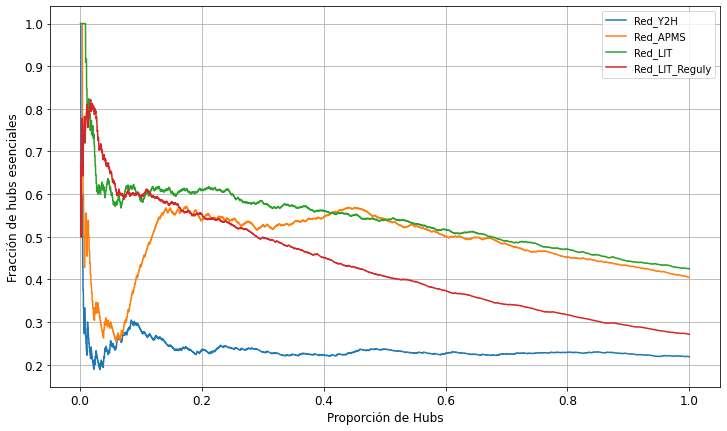

In [158]:
# Quiero armar la figura 1 de Zotenko, donde se muestra la fracción de hubs esenciales en función de la fracción de hubs
lista_esenciales = abrir_esenciales('TC03_data/Essential_ORFs_paperHe.txt')

plt.figure(figsize=(12,7))
plt.xlabel('Proporción de Hubs', fontsize = 12)
plt.ylabel('Fracción de hubs esenciales', fontsize = 12)
plt.tick_params(labelsize = 12) #Ancho de los numeros de los ejes 

plt.grid('True')

# labels = ['Y2H', ' LIT', 'LIT Reg', 'AP-MS']
for i in range(len(redes_lista)):

	Red = redes_lista[i]
	Red_gigante= armar_componente_gigante(Red)
	hubs, fraccion = calcular_fraccion_esenciales(Red_gigante, lista_esenciales)

	plt.plot(hubs, fraccion, label = retrieve_name(redes_lista[i]))
	plt.legend()

In [172]:
# Quiero armar la figura 3 de Zotenko, donde veo como se muere la componente gigante al ir sacando nodos

def desarmar_red(Red,funcion_sacar):
  componente_gigante = armar_componente_gigante(Red)
  tamano_inicial = len(componente_gigante.nodes())
  fraccion_en_gigante = []
  fraccion_quitados = []
  lista_fraccion_restante = []
  i = 1
  while i<tamano_inicial*0.75:
    # Tomamos el nodo a sacar usando la funcion pasada
    nodo_sacar = funcion_sacar(componente_gigante)
    # Lo sacamos
    componente_gigante.remove_node(nodo_sacar)
    # Nos quedamos con la nueva componente gigante
    componente_gigante = armar_componente_gigante(componente_gigante)
    # Guardamos la fracción que queda
    fraccion_restante = (len(componente_gigante.nodes())/tamano_inicial)
    lista_fraccion_restante.append(fraccion_restante)
    # Guardamos la fracción que ya sacamos
    fraccion_quitados.append(i/tamano_inicial)
    # print(i)
    i=i+1
    
  return (fraccion_quitados,lista_fraccion_restante)

# Hacemos funciones que devuelven el nodo a sacar
def sacar_max_centralidad_autovalor(Red):
  # Calcula la centralidad de autovalor
  centralidad = nx.eigenvector_centrality(Red, max_iter = 1000, tol = 1e-05, nstart = None, weight = 'weight')
  # Devuelve el nodo de máxima centralidad
  return max(centralidad, key=centralidad.get)

In [ ]:
diccionario_centralidad_autovalor = nx.eigenvector_centrality(Red, max_iter=100, tol=1e-06, nstart=None, weight='weight')
diccionario_centralidad_cercania = nx.closeness_centrality(Red, u=None, distance=None, wf_improved=True)

In [163]:
diccionario_centralidad_cercania_y2h = nx.closeness_centrality(Red_Y2H, u=None, distance=None, wf_improved=True)
diccionario_centralidad_cercania_y2h

{'MEL1': 0.14491751603441094,
 'YJL092W': 0.17618578910322075,
 'Q0085': 0.11498377470663884,
 'YCR106W': 0.13382887876088023,
 'TORF1': 0.11498377470663884,
 'TORF19': 0.1412599070483705,
 'YDR361C': 0.17080880672977555,
 'TORF21': 0.1273455115778304,
 'YKR048C': 0.15087503719228967,
 'TORF47': 0.11498377470663884,
 'YAL005C': 0.0004957858205255329,
 'YBR101C': 0.0004957858205255329,
 'YAL012W': 0.0,
 'YAL016W': 0.14499573144677838,
 'YIL065C': 0.17570182552295027,
 'YNL127W': 0.12415569425297669,
 'YAL020C': 0.0004957858205255329,
 'YBL071WA': 0.0004957858205255329,
 'YAL021C': 0.172276575108754,
 'YJL112W': 0.199293836220023,
 'YMR124W': 0.19047652525850184,
 'YMR181C': 0.1670073922818544,
 'YNR052C': 0.1750378493775026,
 'YAL024C': 0.12716467444125296,
 'YHR158C': 0.1506212666655029,
 'YAL027W': 0.0011267859557398477,
 'YPL022W': 0.0017706636447340465,
 'YAL028W': 0.17309799692306121,
 'YDL239C': 0.21966319805771953,
 'YAL032C': 0.19145388485218856,
 'YDR416W': 0.1684736556030296,


In [173]:
desarmar_red(Red_LIT,sacar_max_centralidad_autovalor)

ValueError: max() arg is an empty sequence